# 问题

二维正方形平板中，板的初始温度为0，时间$t >= 0$时，$x=0$处的边界受高温，温度为1，其他边界条件不变。域的长度为100，确定$t=400$时，板内的温度分布，并比较LBM与FDM方法的结果。其中，热扩散系数为0.25，格子大小$xl=yl=1.0$。

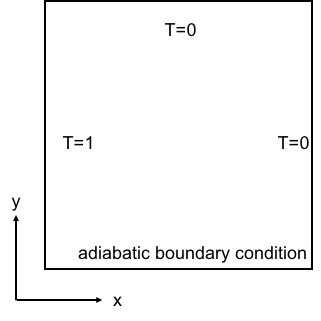

# A.1.3 The LBM Code (D2Q4)

In [5]:
# LBM Code for 2-D, diffusion problem, D2Q4

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


n = 100
m = 100
f1 = np.zeros((n+1,m+1),dtype=float)
f2 = np.zeros((n+1,m+1),dtype=float)
f3 = np.zeros((n+1,m+1),dtype=float)
f4 = np.zeros((n+1,m+1),dtype=float)

rho = np.zeros((n+1,m+1),dtype=float)
x = np.zeros(n+1,dtype=float)
y = np.zeros(m+1,dtype=float)

dx = 1.0
dy = 1.0
dt = 1.0
x[0] = 0.0
y[0] = 0.0

for i in range(1,n+1):
    x[i] = x[i-1] + dx
    
for i in range(1,m+1):
    y[i] = y[i-1] + dy
    
csq = dx*dx/(dt*dt)   # problem
alpha = 0.25
omega = 1.0/(2.*alpha/(dt*csq) + 0.5)
mstep = 400

# initial values of the dependent variable
for j in range(0,m+1):
    for i in range(0,n+1):
        rho[i,j] = 0.0
        
for j in range(0,m+1):
    for i in range(0,n+1):
        f1[i,j] = 0.25*rho[i,j]
        f2[i,j] = 0.25*rho[i,j]
        f3[i,j] = 0.25*rho[i,j]
        f4[i,j] = 0.25*rho[i,j]
        
# main loop
for k in range(1,mstep+1):
    # collision process:
    for j in range(0,m+1):
        for i in range(0,n+1):
            feq = 0.25*rho[i,j]
            f1[i,j] = omega*feq + (1.-omega)*f1[i,j]
            f2[i,j] = omega*feq + (1.-omega)*f2[i,j]
            f3[i,j] = omega*feq + (1.-omega)*f3[i,j]
            f4[i,j] = omega*feq + (1.-omega)*f4[i,j]
            
    # streaming process
    for j in range(0,m+1):
        for i in range(1,n+1):
            f1[n-i,j] = f1[n-i-1,j]
            f2[i-1,j] = f2[i,j]
            
    for i in range(0,n+1):
        for j in range(1,m+1):
            f3[i,m-j] = f3[i,m-j-1]
            f4[i,j-1] = f4[i,j]
            
    # boundary condition
    for j in range(1,m+1):
        f1[0,j] = 0.5 - f2[0,j]
        f3[0,j] = 0.5 - f4[0,j]
        f1[n,j] = f1[n-1,j]
        f2[n,j] = f2[n-1,j]
        f3[n,j] = f3[n-1,j]
        f4[n,j] = f4[n-1,j]
        
    for i in range(1,n+1):
        f1[i,m] = 0.0
        f2[i,m] = 0.0
        f3[i,m] = 0.0
        f4[i,m] = 0.0
        f1[i,0] = f1[i,1]
        f2[i,0] = f2[i,1]
        f3[i,0] = f3[i,1]
        f4[i,0] = f4[i,1]
        
    for j in range(0,m+1):
        for i in range(0,n+1):
            rho[i,j] = f1[i,j] + f2[i,j] + f3[i,j] +f4[i,j]            
# end of the main loop

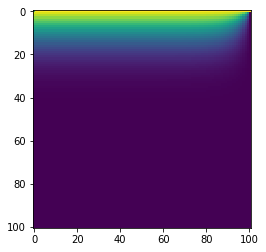

In [7]:
# plot 2D temperature distribution
plt.imshow(rho, interpolation='nearest')
plt.show()